In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

# Load logins.json as a one column DataFrame
logins_df = pd.read_json('logins.json')

In [2]:
def Inc_15min(x):
    if x.minute >= 0 and x.minute <= 14:
        return x.replace(minute=0,second=0)
    elif x.minute >= 15 and x.minute <= 29:
        return x.replace(minute=15,second=0)
    elif x.minute >= 30 and x.minute <= 44:
        return x.replace(minute=30,second=0)
    else:
        return x.replace(minute=45,second=0)

logins_df['Increment_15min'] = logins_df.login_time.apply(Inc_15min).dt.strftime('%a %H:%M')
logins_df

,login_time,Increment_15min
0,1970-01-01 20:13:18,Thu 20:00
1,1970-01-01 20:16:10,Thu 20:15
2,1970-01-01 20:16:37,Thu 20:15
3,1970-01-01 20:16:36,Thu 20:15
4,1970-01-01 20:26:21,Thu 20:15
...,...,...
93137,1970-04-13 18:50:19,Mon 18:45
93138,1970-04-13 18:43:56,Mon 18:30
93139,1970-04-13 18:54:02,Mon 18:45
93140,1970-04-13 18:57:38,Mon 18:45


In [3]:
def dayofweek_num(x):
    if x == "Sun":
        x = 1
    elif x == "Mon":
        x = 2
    elif x == "Tue":
        x = 3
    elif x == "Wed":
        x = 4
    elif x == "Thu":
        x = 5
    elif x == "Fri":
        x = 6
    else:
        x = 7
    return x

login_time_series = logins_df.groupby('Increment_15min').count().reset_index()
login_time_series.rename(columns={'login_time':'login_count'},inplace=True)
login_time_series['dayofweek_name'] = login_time_series.Increment_15min.apply(lambda x: x[0:3])
login_time_series['dayofweek_num'] = login_time_series['dayofweek_name'].apply(dayofweek_num)
login_time_series['time_decimal'] = login_time_series.Increment_15min.apply(lambda x: float(x[4:6] + '.' + x[7:]))
login_time_series = login_time_series.sort_values(by=['dayofweek_num','time_decimal']).reset_index().iloc[:,1:]
login_time_series

,Increment_15min,login_count,dayofweek_name,dayofweek_num,time_decimal
0,Sun 00:00,260,Sun,1,0.00
1,Sun 00:15,274,Sun,1,0.15
2,Sun 00:30,297,Sun,1,0.30
3,Sun 00:45,292,Sun,1,0.45
4,Sun 01:00,279,Sun,1,1.00
...,...,...,...,...,...
667,Sat 22:45,307,Sat,7,22.45
668,Sat 23:00,256,Sat,7,23.00
669,Sat 23:15,260,Sat,7,23.15
670,Sat 23:30,250,Sat,7,23.30


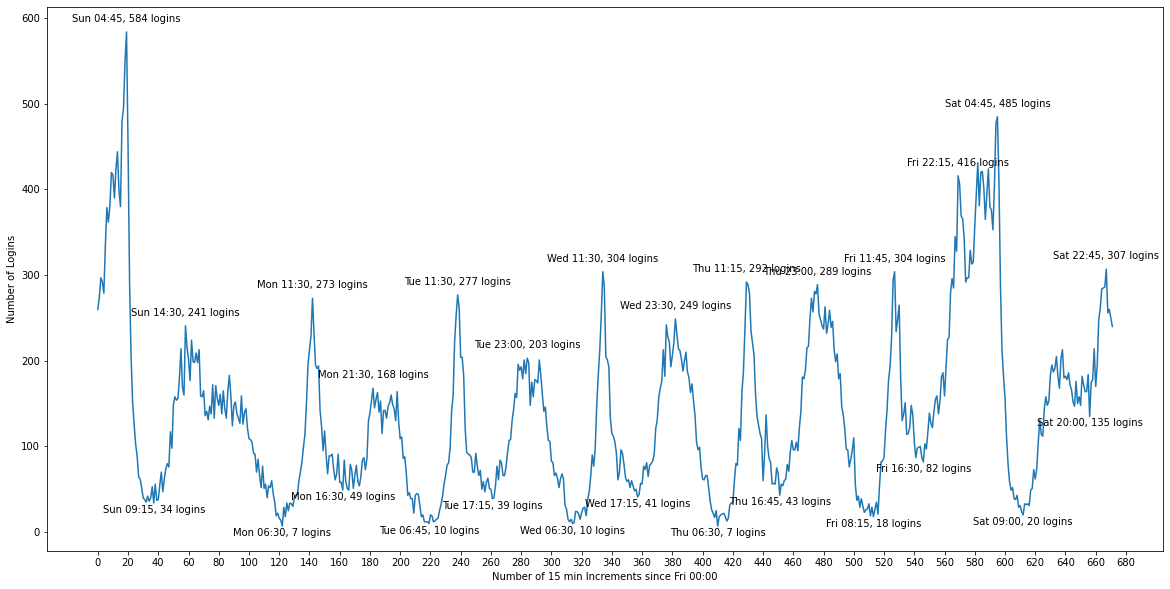

In [4]:
plt.figure(figsize=[20,10])
plt.plot(login_time_series.index, login_time_series.login_count)
plt.xticks(range(0,700,20))
plt.xlabel('Number of 15 min Increments since Fri 00:00')
plt.ylabel('Number of Logins')

# Maximum logins
xs_max = [19,58,142,182,238,284,334,382,429,476,527,569,595,667]
x_lab_max = login_time_series.Increment_15min.iloc[xs_max]
ys_max = login_time_series.login_count.iloc[xs_max]

for l,x,y in zip(x_lab_max, xs_max, ys_max):
    label = "{0:s}, {1:d} logins".format(l,y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')


# Minimum logins
xs_min = [37,122,162,219,261,314,357,410,451,513,546,612,656]
x_lab_min = login_time_series.Increment_15min.iloc[xs_min]
ys_min = login_time_series.login_count.iloc[xs_min]

for l,x,y in zip(x_lab_min, xs_min,ys_min):
    label = "{0:s}, {1:d} logins".format(l,y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='center')
    
plt.show()

In [5]:
login_time_series.iloc[xs_max]

,Increment_15min,login_count,dayofweek_name,dayofweek_num,time_decimal
19,Sun 04:45,584,Sun,1,4.45
58,Sun 14:30,241,Sun,1,14.30
142,Mon 11:30,273,Mon,2,11.30
182,Mon 21:30,168,Mon,2,21.30
238,Tue 11:30,277,Tue,3,11.30
284,Tue 23:00,203,Tue,3,23.00
334,Wed 11:30,304,Wed,4,11.30
382,Wed 23:30,249,Wed,4,23.30
429,Thu 11:15,292,Thu,5,11.15
476,Thu 23:00,289,Thu,5,23.00


In [6]:
login_time_series.iloc[xs_min]

,Increment_15min,login_count,dayofweek_name,dayofweek_num,time_decimal
37,Sun 09:15,34,Sun,1,9.15
122,Mon 06:30,7,Mon,2,6.30
162,Mon 16:30,49,Mon,2,16.30
219,Tue 06:45,10,Tue,3,6.45
261,Tue 17:15,39,Tue,3,17.15
314,Wed 06:30,10,Wed,4,6.30
357,Wed 17:15,41,Wed,4,17.15
410,Thu 06:30,7,Thu,5,6.30
451,Thu 16:45,43,Thu,5,16.45
513,Fri 08:15,18,Fri,6,8.15
